In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

Here are examples of loading data with different formats. 

In [64]:
import os
import json
def read_csv_space(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep='\s+', index_col=False, engine='python') 

def read_csv_comma(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep=',', engine='python') 

def json_load(path, file):
    with open(os.path.join(path, file), encoding='', mode='r') as f:
        v = json.load(f)
        f.close()
    return v

def read_text(path, file):
    with open(os.path.join(path, file),encoding='', mode='r') as f:
        lines = []
        for l in f:
            lines.append(l.rstrip('\n').split('\t'))
    return lines 

def table_load(self, path, file_name):
    df = pd.read_excel(os.path.join(path, file_name), engine='openpyxl', sheet_name=0)
    mylist = df['words'].tolist()
    return mylist

We still use the Boston housing price data for demostration. 

In [65]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) 
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
xmat=boston_df.drop('Price',axis=1)
y =boston_df['Price']
X_list = xmat.columns 
print(X_list)
len(boston_df)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


506

Split data into training and test sample. 

In [66]:
X_train,X_test,y_train,y_test=train_test_split(xmat,y,test_size=0.2,random_state=3)

Linear regression 

In [67]:
reg = LinearRegression()
reg.fit(X_train, y_train)
train_score=reg.score(X_train,y_train)
test_score=reg.score(X_test,y_test)
print(test_score)
print(reg.coef_)
yhat = reg.predict(X_test)

0.7952617563243852
[-1.23897571e-01  4.81822924e-02 -4.74497796e-02  3.36938950e+00
 -1.56635488e+01  3.59419367e+00 -9.33206067e-03 -1.47089101e+00
  3.05053544e-01 -1.08397039e-02 -9.08791339e-01  1.00352939e-02
 -4.77714677e-01]


In [68]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print(test_score)
print(lasso.coef_)

0.7781325701654644
[-0.11469086  0.04982345 -0.09373167  1.60847689 -0.          3.51494142
 -0.01888261 -1.18575423  0.26859655 -0.01204955 -0.73803508  0.01068735
 -0.52980413]


Ridge regression

In [69]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
coeff_used = np.sum(ridge.coef_!=0)
print(test_score)
print(ridge.coef_)

0.791190045570263
[-1.21790178e-01  4.84274483e-02 -6.67541535e-02  3.27053220e+00
 -1.10530544e+01  3.63279229e+00 -1.34407097e-02 -1.39938937e+00
  2.92168740e-01 -1.09981055e-02 -8.54768803e-01  1.02290603e-02
 -4.85349871e-01]


Elastic net

In [70]:
elas = ElasticNet(alpha=0.5, l1_ratio=0.5)
elas.fit(X_train, y_train)
train_score=elas.score(X_train,y_train)
test_score=elas.score(X_test,y_test)
print(test_score)


0.7498390618855599


Using K-fold cross validation (k=10) to tune the hyper parameter in Lasso regression

In [71]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0.001, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.378
Config: {'alpha': 0.011}


Using K-fold cross validation to tune the two hyper parameters in elastic net

In [72]:
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0.001, 1, 0.2)
grid['l1_ratio'] = np.arange(0, 1, 0.2)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.999e+03, tolerance: 3.737e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+03, tolerance: 3.929e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

MAE: -3.379
Config: {'alpha': 0.001, 'l1_ratio': 0.0}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.606e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


An illustration of K-fold cross-validation

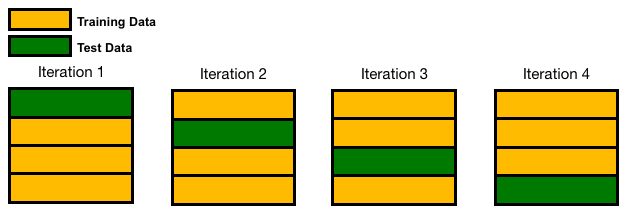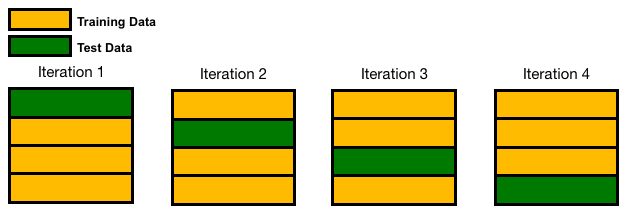

In [73]:
from sklearn.utils import shuffle
def cross_validation_split(df, folds):
    df_copy = df.copy()
    group_size = int(df_copy.shape[0] / folds)
        
    # re-ordering rows of data set randomly
    df_copy = shuffle(df_copy)
    lst = [df_copy.iloc[i:i+group_size] for i in range(0,len(df_copy),group_size)]
    if len(lst[-1]) < group_size:
        lst.pop()
    return lst 

def lasso_cv(data_groups, alpha_test):
    lasso = Lasso(alpha=alpha_test)
    scores = []
    for i in range(len(data_groups)):
        data_copy = data_groups.copy()
        test_data = data_copy[i]
        X_test = test_data[X_list]
        y_test = test_data['Price']
        data_copy.pop(i)
        training_data = pd.concat(data_copy)
        X_train = training_data[X_list] 
        y_train = training_data['Price']
        lasso.fit(X_train,y_train)
        test_score=lasso.score(X_test,y_test)
        scores.append(test_score)
    return scores


In [74]:
d = cross_validation_split(boston_df, 5)
s = lasso_cv(d, 0.5)
s

[0.6461776470647218,
 0.6719025257135067,
 0.6206050683681739,
 0.792090889988631,
 0.7306115137024412]

In [75]:
np.arange(0.001, 1, 0.2)

array([0.001, 0.201, 0.401, 0.601, 0.801])